In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split

In [6]:
final_df = pd.read_csv("data/final_df.csv")


In [ ]:
top_5_crime = final_df.groupby("city_state")[["total_crime", ""]].mean().nlargest(5)
top_5_crime_df = final_df[final_df["city_state"].isin(top_5_crime.index)]
top_5_crime_df = top_5_crime_df.groupby(["year", "city_state"])["total_crime"].mean().reset_index()
top_5_crime_df

,year,city_state,total_crime
0,2014,"Chicago, IL",86708.0
1,2014,"Houston, TX",185170.0
2,2014,"Memphis, TN",69109.0
3,2014,"Philadelphia, PA",76679.0
4,2014,"Phoenix, AZ",64304.0
5,2015,"Chicago, IL",83134.0
6,2015,"Houston, TX",187980.0
7,2015,"Memphis, TN",66260.0
8,2015,"Philadelphia, PA",76267.0
9,2015,"Phoenix, AZ",64400.0


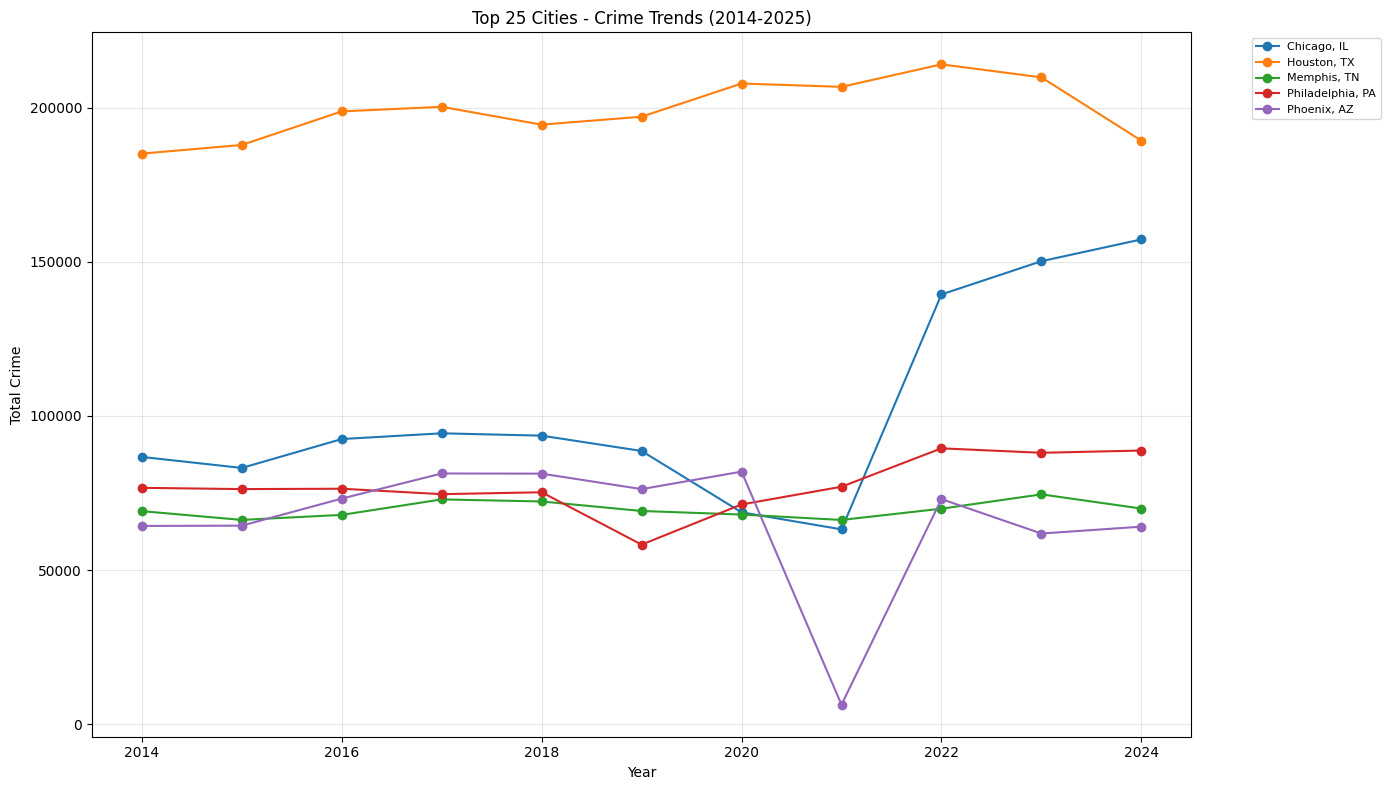

In [25]:
# Create line graph with year on x-axis and each city as a separate line
plt.figure(figsize=(14, 8))
for city in top_5_crime_df['city_state'].unique():
    city_data = top_5_crime_df[top_5_crime_df['city_state'] == city]
    plt.plot(city_data['year'], city_data['total_crime'], marker='o', label=city)

plt.xlabel('Year')
plt.ylabel('Total Crime')
plt.title('Top 25 Cities - Crime Trends (2014-2025)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [26]:
final_df

,date,year,city_state,year_city_state,indicator_id,indicator,value,actual_murder,actual_rape_total,actual_robbery_total,actual_assault_total,actual_theft_total,total_crime
0,2024-12-31,2024,"Addison, IL","2024: Addison, IL",Z1BR,ZHVI 1-Bedroom Time Series ($),148982.538151,0,17,8,436,189,650
1,2024-12-31,2024,"Aiken, SC","2024: Aiken, SC",Z1BR,ZHVI 1-Bedroom Time Series ($),219460.905137,12,50,43,2489,2413,5007
2,2024-12-31,2024,"Alamogordo, NM","2024: Alamogordo, NM",Z1BR,ZHVI 1-Bedroom Time Series ($),122933.137380,0,7,1,771,740,1519
3,2024-12-31,2024,"Angola, IN","2024: Angola, IN",Z1BR,ZHVI 1-Bedroom Time Series ($),167614.203670,0,7,0,258,291,556
4,2024-12-31,2024,"Ashburnham, MA","2024: Ashburnham, MA",Z1BR,ZHVI 1-Bedroom Time Series ($),310245.490141,0,3,0,34,13,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1674301,2014-12-31,2014,"Savannah, NY","2014: Savannah, NY",ZSFH,ZHVI Single-Family Homes Time Series ($),79614.900483,0,0,0,0,0,0
1674302,2014-12-31,2014,"Sodus, NY","2014: Sodus, NY",ZSFH,ZHVI Single-Family Homes Time Series ($),86804.413868,0,2,0,1,20,23
1674303,2014-12-31,2014,"Wolcott, NY","2014: Wolcott, NY",ZSFH,ZHVI Single-Family Homes Time Series ($),112239.200384,0,0,0,2,4,6
1674304,2014-12-31,2014,"Lyons, NY","2014: Lyons, NY",ZSFH,ZHVI Single-Family Homes Time Series ($),78391.854145,0,21,12,437,422,892


In [ ]:

ax = city_state_25.plot(kind='bar', x='city_state', y='total_incidents')
plt.title('Top 25 Cities by Total Incidents')
plt.xlabel('City, States')
plt.ylabel('Total Incidents')
ax.tick_params(axis='x', labelsize=8)
plt.show()

In [ ]:
city_state["total_incidents"].plot(kind="box")
plt.ylim(0, 500)
plt.title("Total_Incidents Box Plot")